In [1]:
#Pretend you are a data scientist at a drug retailer/pharmacy evaluating the previous years drug
#manufacturer financial data with the goal of identifying drugs that could be manufactured directly 
#by the pharmacy you work for to increase profit. 
#From this dataset: https://www.statista.com/statistics/473429/top-global-pharmaceutical-companies-
#gross-margin-values/
#You determine that drugs that the pharmacy breaks even or loses money on that the manufactuer profits
#are the target as they would be more profitable to license the recipe and manufacture than to buy. 
#To do this, you develop a prediction model to know whenever a new drug comes out, whether or not the
#pharmacy should try to license the drug recipe and manufacture itself or to purchase the drug from 
#the manufacturer based only on package size, and initially planned price points to buy and sell the
#drug at (assuming cost to manufacture is not known in present day)

In [44]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [37]:
#Default theme
sns.set_theme(palette='tab10',
              font='Lucida Calligraphy',
              font_scale=1.5,
              rc=None)

import matplotlib
matplotlib.rcParams.update({'font.size': 15})
plt.style.use('dark_background')

In [38]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [50]:
df=pd.read_csv('TM_2021.csv')
df.sample(6).style.set_properties(
    **{
        'background-color': 'Brown',
        'color': 'white',
        'border-color': 'White'
    })

,Medication_Name,Package_Size,Manufacturing_Cost,Max_Retailer_Price,Max_Consumer_Price
1960,PLAVIX 300MG 30TAB,30.000000,$60.16,$150.40,$176.72
2441,STATOR 5MG 28 FC TAB,28.000000,$5.65,$14.12,$18.99
2483,SUTENT 25MG 28CAPS,28.000000,$927.04,"$2,317.59","$2,549.35"
2290,SELEGILENE 5MG 50TAB,50.000000,$8.53,$21.32,$28.67
2170,RHINOLAST SPRAY 0.1% 10ML,10.000000,$2.46,$6.15,$8.43
2825,VINORELBINE-TRIMA 10MG/ML1 VIAL,1.000000,$7.50,$18.75,$25.22


In [60]:
import re

def extract_value(text):
    pattern = r'\$(\d+(?:\.\d+)?)'
    match = re.search(pattern, text)
    if match:
        value = match.group(1)
        return float(value)
    else:
        return None
    
##reformat columns to be values
df["Max_Retailer_Price"] = df["Max_Retailer_Price"].apply(extract_value)
df["Manufacturing_Cost"] = df["Manufacturing_Cost"].apply(extract_value)
df["Max_Consumer_Price"] = df["Max_Consumer_Price"].apply(extract_value)
df.head()

,Medication_Name,Package_Size,Manufacturing_Cost,Max_Retailer_Price,Max_Consumer_Price
0,ABBOSYNAGIS 100MG PUL FOR INJ+SOLV,1.0,343.97,859.93,945.93
1,ABBOSYNAGIS 50MG PUL FOR INJ+SOLV,1.0,187.33,468.33,550.29
2,ABELCET 5MG/ML 10 VIAL 20ML (100MG/20ML),10.0,457.55,1.00,1.00
3,ABILIFY MAINTENA 300 MG VIAL,1.0,142.00,355.00,417.13
4,ABILIFY MAINTENA 400 MG/PREFILLED SYR,1.0,115.53,288.83,339.38


In [69]:
## Creating manufacturer gross profit retailer gross profit columns
df["Manufacturing_Profit"] = ((df["Max_Retailer_Price"]-df["Manufacturing_Cost"])/df["Max_Retailer_Price"])
df["Retailer_Profit"] = ((df["Max_Consumer_Price"]-df["Max_Retailer_Price"])/df["Max_Consumer_Price"])
df['Dec_to_Manufacture'] = ((df['Manufacturing_Profit'] > 0) & (df['Retailer_Profit'] <= 0)).astype(int)
        

In [70]:
display(df.shape)
display(df.size)

(2984, 9)

26856

In [76]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2984 entries, 0 to 2983
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Medication_Name       2984 non-null   object 
 1   Package_Size          2984 non-null   float64
 2   Manufacturing_Cost    2984 non-null   float64
 3   Max_Retailer_Price    2984 non-null   float64
 4   Max_Consumer_Price    2984 non-null   float64
 5   Manufacturing_Profit  2984 non-null   float64
 6   Retailer_Profit       2984 non-null   float64
 7   Dec_to_Manufacture    2984 non-null   int32  
dtypes: float64(6), int32(1), object(1)
memory usage: 175.0+ KB


In [77]:
df.describe().style.background_gradient(cmap="magma")

,Package_Size,Manufacturing_Cost,Max_Retailer_Price,Max_Consumer_Price,Manufacturing_Profit,Retailer_Profit,Dec_to_Manufacture
count,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000
mean,36.613673,70.704226,99.793338,108.254829,-25.730396,-6.220308,0.042225
std,144.593391,151.165209,188.306402,195.521234,117.808993,78.162299,0.201136
min,1.000000,0.450000,1.000000,1.000000,-798.900000,-997.030000,0.000000
25%,5.000000,2.677500,5.500000,7.057500,0.599909,0.148932,0.000000
50%,28.000000,9.310000,17.740000,22.945000,0.600000,0.200076,0.000000
75%,30.000000,46.797500,81.632500,89.905000,0.600095,0.269648,0.000000
max,5000.000000,974.440000,998.030000,996.300000,0.750000,0.500000,1.000000


In [83]:
print('Exploratory Data Analysis (EDA)')


Exploratory Data Analysis (EDA)


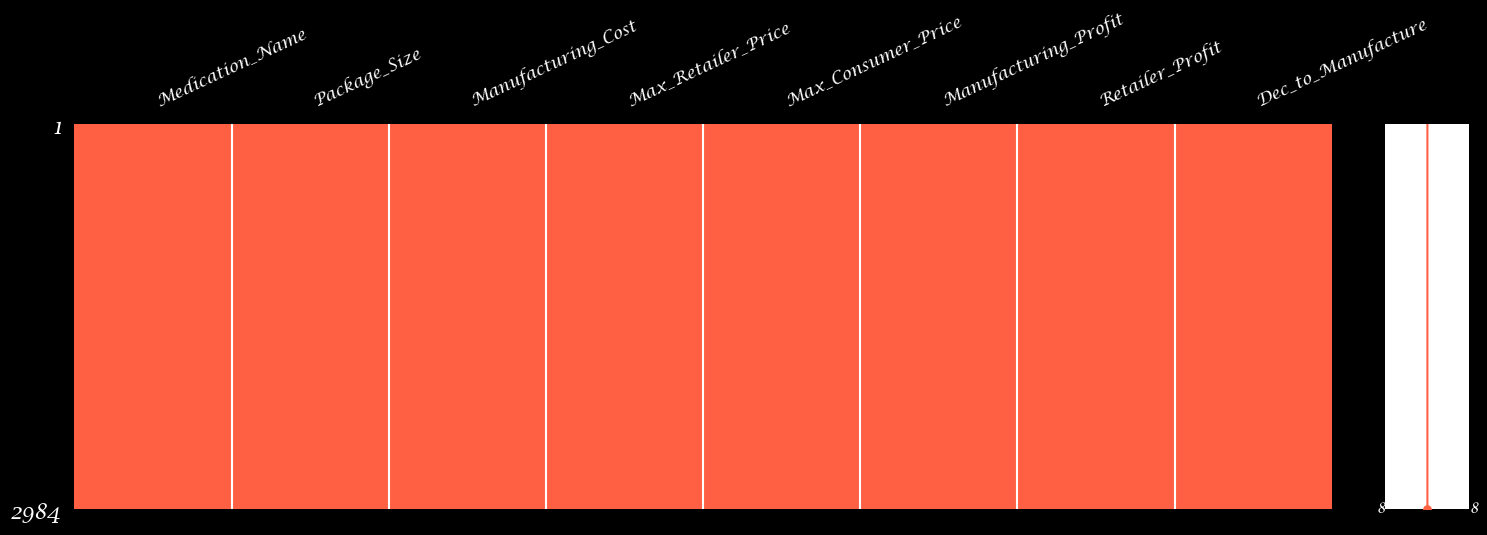

In [86]:
import missingno as msno
msno.matrix(df, figsize=(18,5), fontsize=12, color=(1, 0.38, 0.27));
plt.xticks(rotation=25);

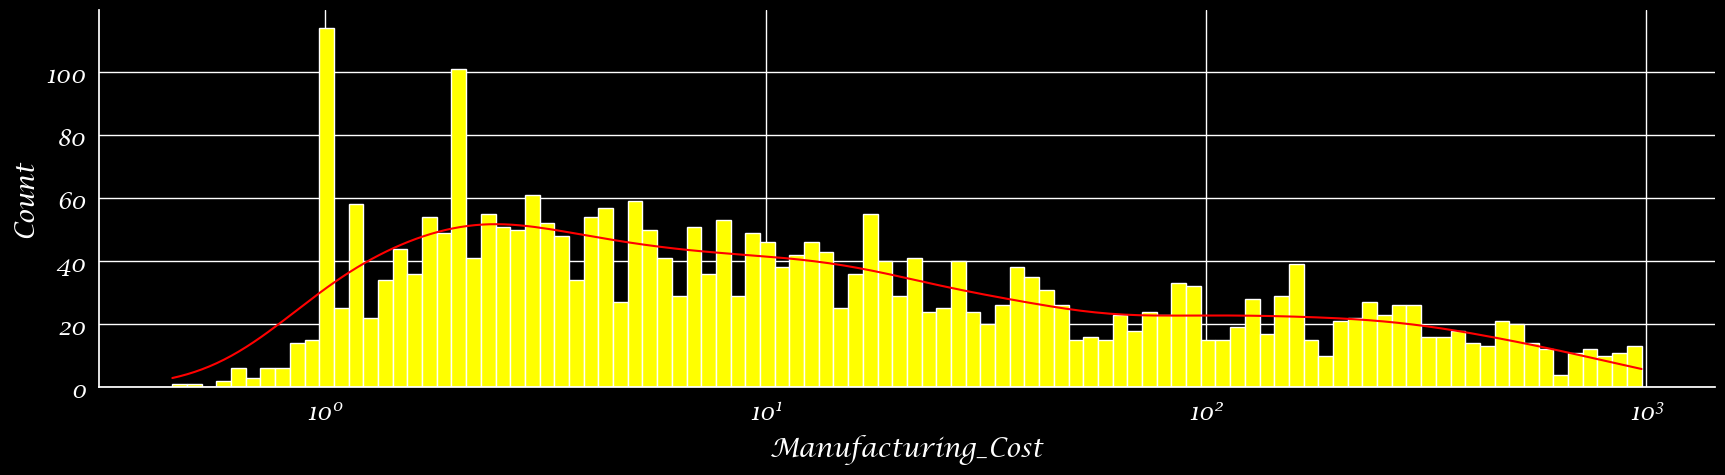

In [89]:
sns.displot(data=df,log_scale=True, x="Manufacturing_Cost", kde=True, bins = 100,color = "red", facecolor = "yellow",height = 5, aspect = 3.5);

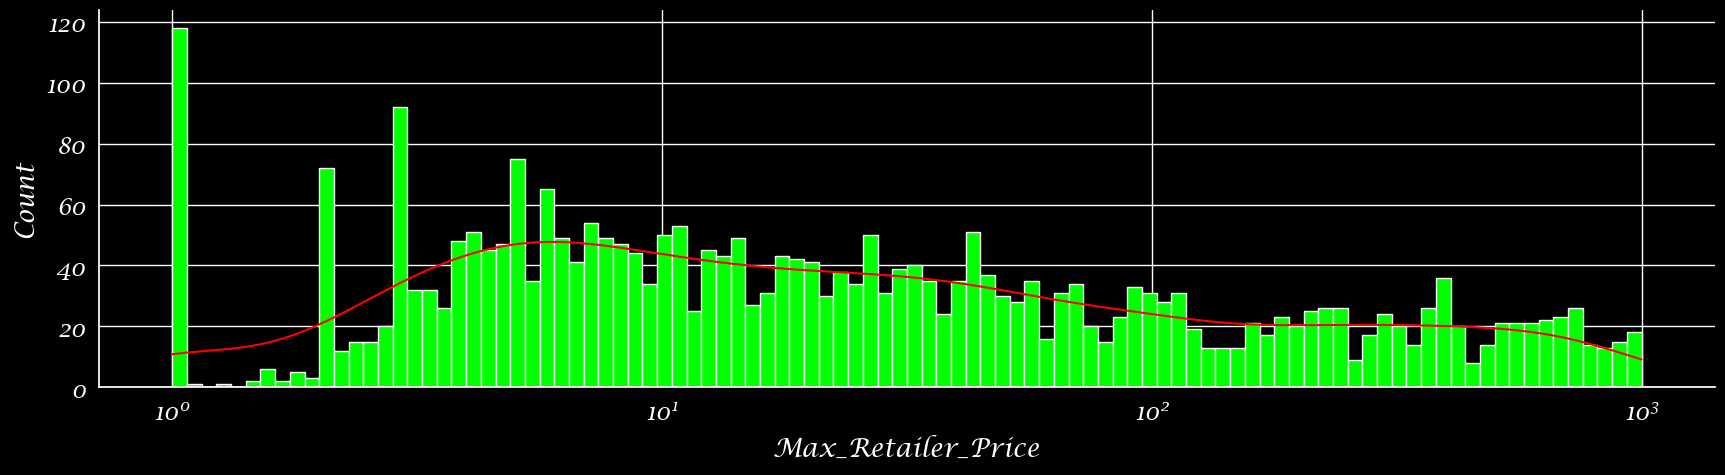

In [91]:
sns.displot(data=df,log_scale=True,x="Max_Retailer_Price", kde=True, bins = 100,color = "red", facecolor = "lime",height = 5, aspect = 3.5);

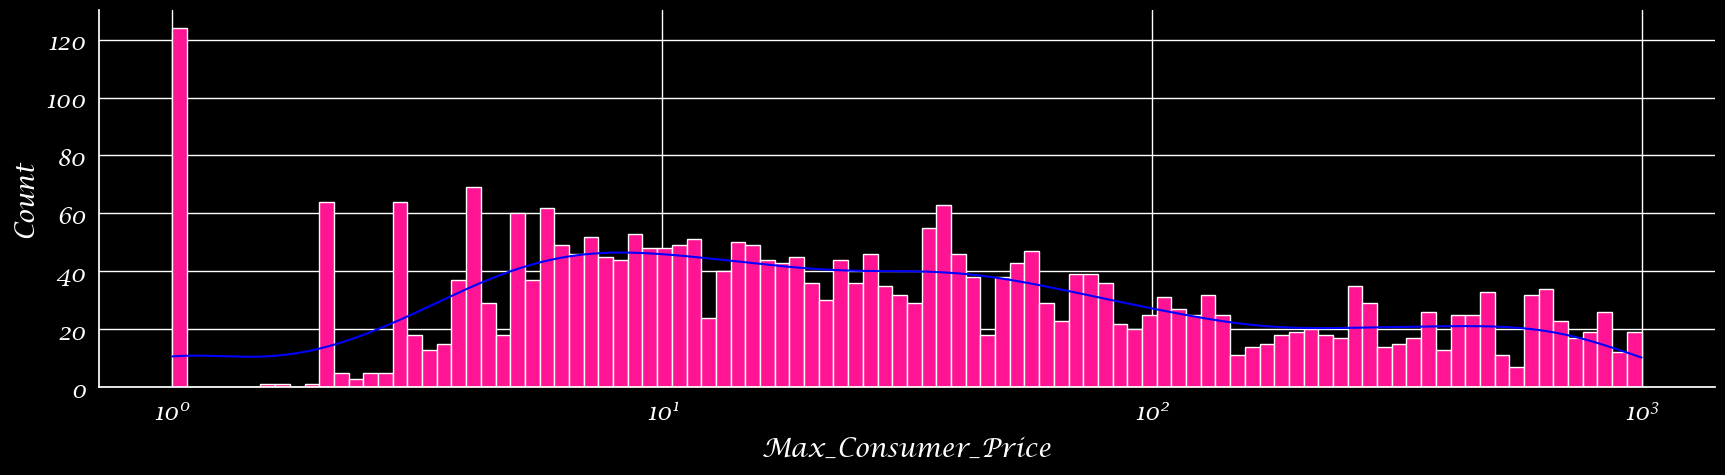

In [93]:
sns.displot(data=df, log_scale=True,x="Max_Consumer_Price", kde=True, bins = 100,color = "blue", facecolor = "DeepPink",height = 5, aspect = 3.5);

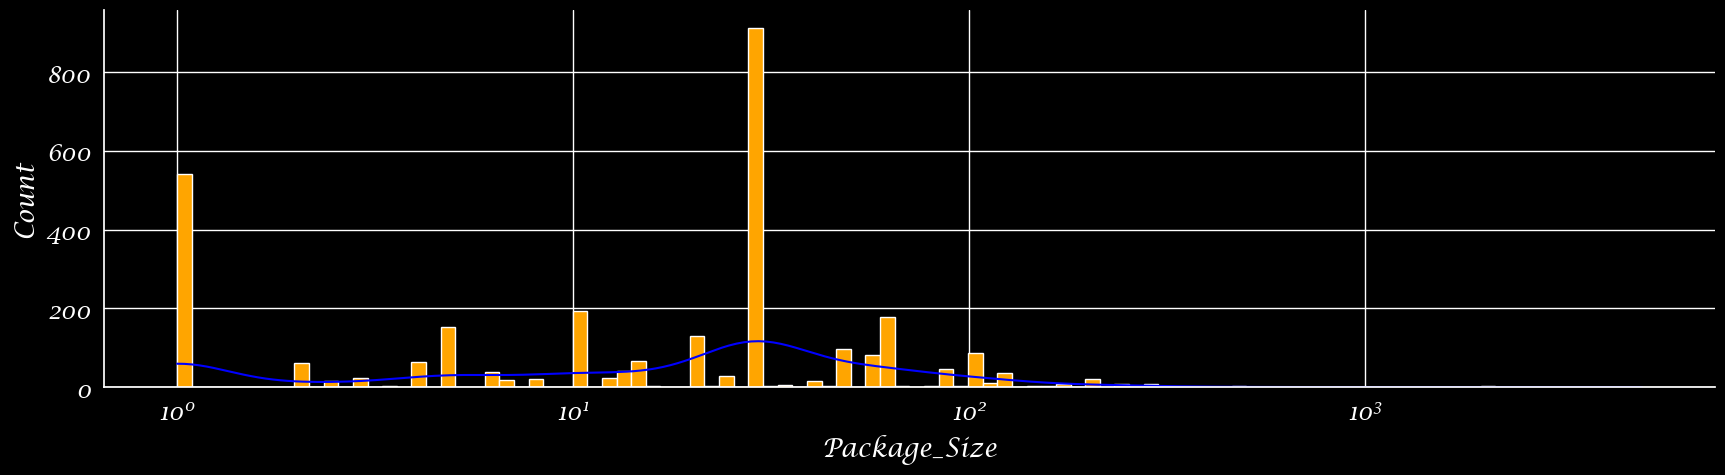

In [97]:
sns.displot(data=df, log_scale=True,x="Package_Size", kde=True, bins = 100,color = "blue", facecolor = "Orange",height = 5, aspect = 3.5);

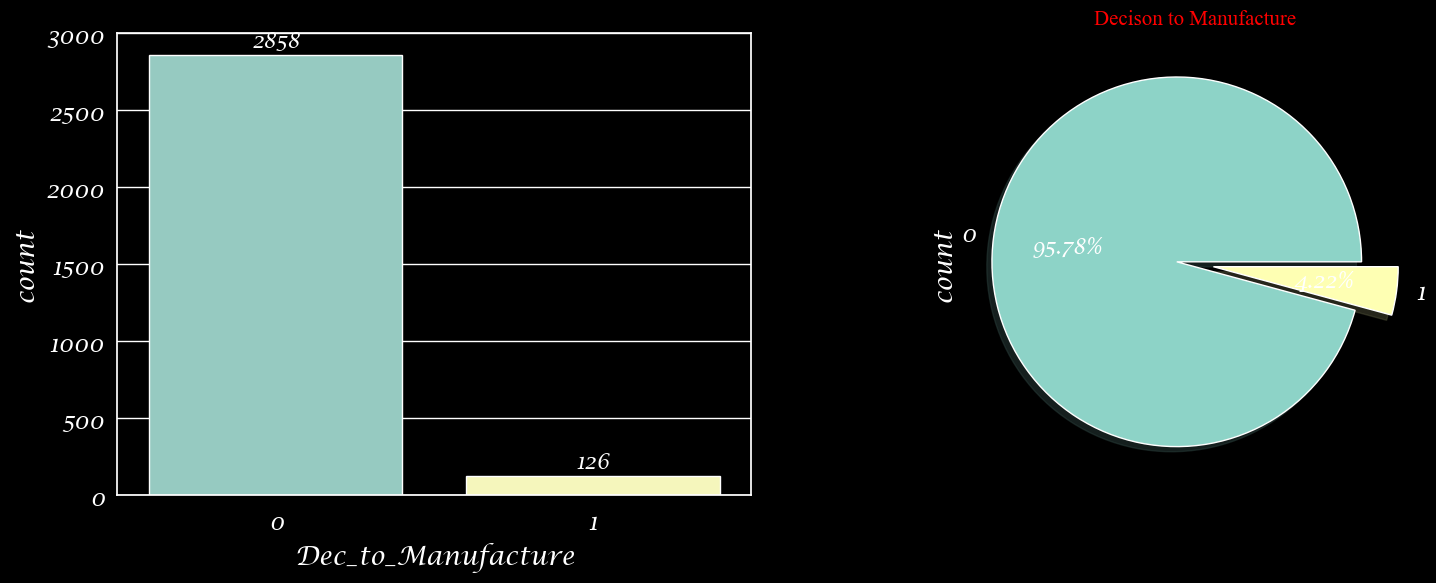

In [100]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Dec_to_Manufacture', data=df)
ax.bar_label(ax.containers[0])
ax =plt.subplot(1,2,2)
ax=df['Dec_to_Manufacture'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
plt.title("Dec_to_Manufacture", fontsize=20,color='Red',font='Times New Roman')
ax.set_title(label = "Decison to Manufacture", fontsize = 20,color='Red',font='Times New Roman');

In [102]:
#Define training parameters for models

In [145]:
X = df.drop(columns=["Dec_to_Manufacture","Medication_Name","Manufacturing_Cost","Manufacturing_Profit"], axis=1)
y = df["Dec_to_Manufacture"]

In [146]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [ ]:
# Logistic Regression

In [147]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_lr))

--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       573
           1       1.00      0.50      0.67        24

    accuracy                           0.98       597
   macro avg       0.99      0.75      0.83       597
weighted avg       0.98      0.98      0.98       597

--------------------------------------------------------
Confusion Matrix: 
 [[573   0]
 [ 12  12]]


In [148]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_dec))



--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       573
           1       0.88      0.96      0.92        24

    accuracy                           0.99       597
   macro avg       0.94      0.98      0.96       597
weighted avg       0.99      0.99      0.99       597

--------------------------------------------------------
Confusion Matrix: 
 [[570   3]
 [  1  23]]


In [149]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_rf))

--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       573
           1       0.88      0.96      0.92        24

    accuracy                           0.99       597
   macro avg       0.94      0.98      0.96       597
weighted avg       0.99      0.99      0.99       597

--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       573
           1       0.88      0.96      0.92        24

    accuracy                           0.99       597
   macro avg       0.94      0.98      0.96       597
weighted avg       0.99      0.99      0.99       597

Confusion Matrix: 
 [[570   3]
 [  1  23]]


In [150]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_svc))

--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       573
           1       1.00      0.04      0.08        24

    accuracy                           0.96       597
   macro avg       0.98      0.52      0.53       597
weighted avg       0.96      0.96      0.94       597

--------------------------------------------------------
Confusion Matrix: 
 [[573   0]
 [ 23   1]]


In [151]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest',
        'Decision Tree'
    ],
    
    'Training Accuracy':
    [log_train, svc_train, decision_train, random_forest_train],
    
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy
    ]
})

In [152]:
print(models)

                     Model  Training Accuracy  Model Accuracy Score
0  Support Vector Machines              98.07                 97.99
1      Logistic Regression              96.52                 96.15
2            Random Forest              99.79                 99.33
3            Decision Tree              99.79                 99.33


In [153]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
44,1,1
370,0,0
1497,0,0
1695,0,0
2264,0,0
